In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tf.__version__

'2.12.0'

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# 70%
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# 20%
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/data/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# 10%
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 895 images belonging to 2 classes.
Found 399 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())
cnn.add(Dropout(0.5))

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
cnn.add(Dropout(0.5))

## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = val_set, epochs = 20)

Epoch 1/20
28/28 [==============================] - 8s 222ms/step - loss: 0.0232 - accuracy: 0.9877 - val_loss: 0.1391 - val_accuracy: 0.9298
Epoch 2/20
28/28 [==============================] - 5s 165ms/step - loss: 0.0258 - accuracy: 0.9888 - val_loss: 0.1053 - val_accuracy: 0.9524
Epoch 3/20
28/28 [==============================] - 4s 160ms/step - loss: 0.0322 - accuracy: 0.9877 - val_loss: 0.0836 - val_accuracy: 0.9549
Epoch 4/20
28/28 [==============================] - 5s 191ms/step - loss: 0.0284 - accuracy: 0.9877 - val_loss: 0.0530 - val_accuracy: 0.9724
Epoch 5/20
28/28 [==============================] - 6s 214ms/step - loss: 0.0298 - accuracy: 0.9888 - val_loss: 0.0918 - val_accuracy: 0.9499
Epoch 6/20
28/28 [==============================] - 5s 166ms/step - loss: 0.0256 - accuracy: 0.9911 - val_loss: 0.1229 - val_accuracy: 0.9373
Epoch 7/20
28/28 [==============================] - 5s 188ms/step - loss: 0.0403 - accuracy: 0.9866 - val_loss: 0.2033 - val_accuracy: 0.8997
Epoch 

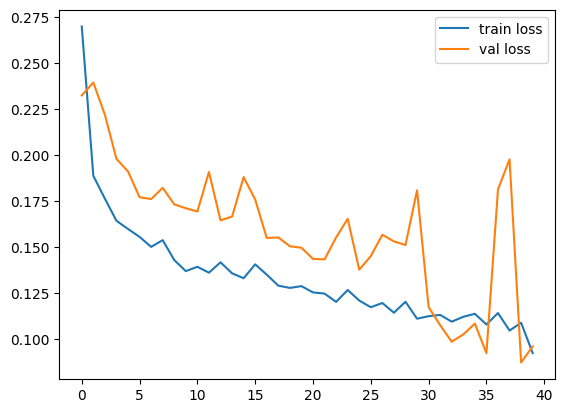

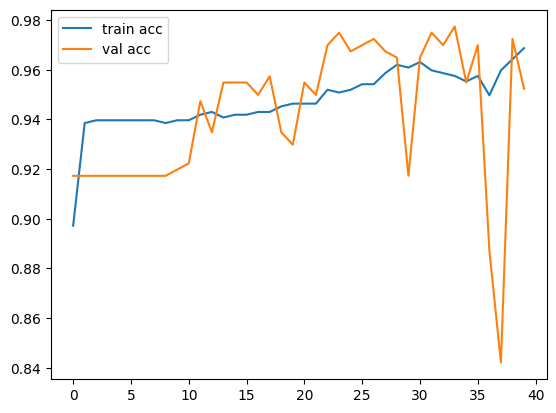

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
cnn.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.Accuracy()])
tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model_json = cnn.to_json()
with open("seatbelt.json", "w") as json_file:
    json_file.write(model_json)

cnn.save_weights('seatbelt.h5')

Loaded model from disk
Found 399 images belonging to 2 classes.


<ipython-input-14-20deb23d181d>:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[ 33   0]
 [366   0]]


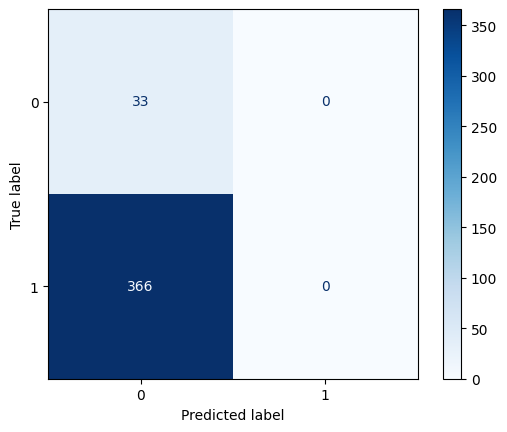

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        33
           1       0.00      0.00      0.00       366

    accuracy                           0.08       399
   macro avg       0.04      0.50      0.08       399
weighted avg       0.01      0.08      0.01       399



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "no seatbelt", 1: "seat_belt"}

# load json and create model
json_file = open('seatbelt.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("seatbelt.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        '/content/drive/MyDrive/data/test',
        target_size=(64, 64),
        batch_size=32,
        color_mode="rgb",
        class_mode='binary')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))





In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('seatbelt.h5')

In [ ]:

model.summary()

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/data/test/no seatbelt/young-woman-driving-a-car-elegant-business-lady-driving-an-expensive-car.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

In [ ]:
if result[0]<0:
    print("The image classified is no seat belt")
else:
    print("The image classified is with seat belt")

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/data/test/seat_belt/221JBW5TMVMO.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

In [ ]:
if result[0]<0:
    print("The image classified is no seat belt")
else:
    print("The image classified is with seat belt")